In [1]:
#inspect_stock_data.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#23 January 2018
#
#this reads some NYSE data and makes some charts

In [41]:
#import matplotlib pandas etc
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
pd.set_option('display.max_columns', None)

In [42]:
#select date ranges, for plotting and for models
data_date_range  = ('2016-01-01', '2018-01-12')
plot_date_range  = ('2016-03-01', '2018-01-12')
model_date_range = ('2017-01-12', '2018-01-12')

In [43]:
#read NYSE data
from helper_fns import *
data_path = 'data'
drop_holidays=True
market = read_nyse_data(data_path, start_date=data_date_range[0], end_date=data_date_range[1],
    drop_holidays=drop_holidays)
print market.dtypes
market.head(5)

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
vol                int64
dtype: object


,ticker,date,open,high,low,close,vol
1152200,A,2016-01-04,41.06,41.19,40.34,40.69,3287300
1152201,AA,2016-01-04,28.56,29.40,28.35,29.13,37919300
1152202,AAC,2016-01-04,18.88,18.95,18.07,18.52,119600
1152203,AAN,2016-01-04,22.11,22.77,21.95,22.68,698600
1152204,AAP,2016-01-04,149.25,154.48,147.51,152.24,1935300


In [44]:
#compute volume of shares traded each day
daily_volume = market.groupby('date')['vol'].sum()

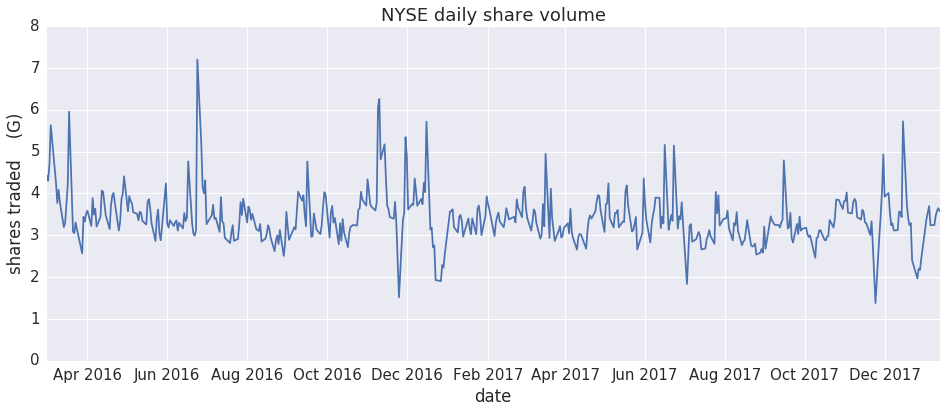

In [45]:
#plot daily volume vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = daily_volume.index
yp = daily_volume.values/1.0e9
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('NYSE daily share volume')
ax.set_xlabel('date')
ax.set_ylabel('shares traded    (G)')
ax.set_ylim(0, 8)
ax.set_xlim(plot_date_range)
plt.savefig('figs/volume.png')

In [46]:
#compute volume-weighted share price versus date
def volume_weighted_share_price(record):
    vwsp = None
    cv = record['close']*record['vol']
    v_total = record['vol'].sum()
    if (v_total > 0.0):
        vwsp = cv.sum()/v_total
    return vwsp
vwsp = market.groupby('date').apply(volume_weighted_share_price)

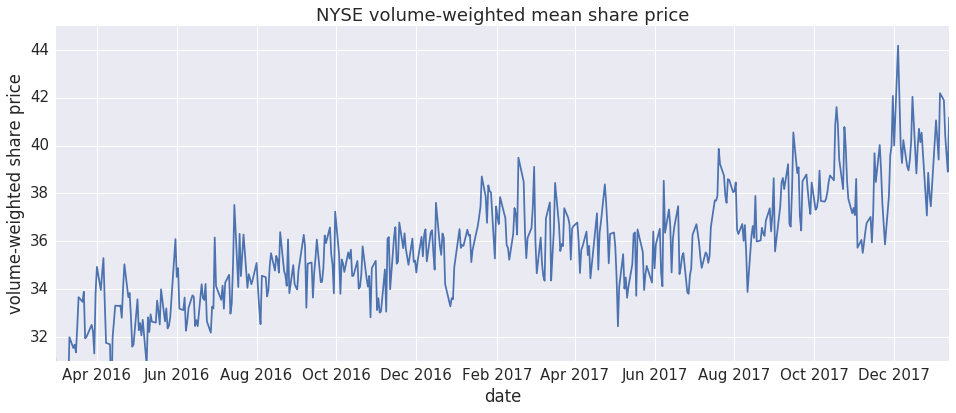

In [47]:
#plot volume-weighted share price vs date
fig, ax = plt.subplots(figsize=(16, 6))
xp = vwsp.index
yp = vwsp.values
p = ax.plot(xp, yp, linestyle='-')
ax.set_title('NYSE volume-weighted mean share price')
ax.set_xlabel('date')
ax.set_ylabel('volume-weighted share price')
ax.set_ylim(31, 45)
ax.set_xlim(plot_date_range)
plt.savefig('figs/vwsp.png')

In [166]:
N_tickers = 5
rn_seed = 16
initial_dollars = 10000.0
idx = (market['date'] >= model_date_range[0]) & (market['date'] <= model_date_range[1])
df = market[idx].copy()
dates = df['date'].unique()
np.random.seed(seed=rn_seed)
dollars = initial_dollars
for date in dates:
    idx = (df['date'] == date)
    df_1day = df[idx]
    all_tickers = df_1day['ticker'].unique()
    selected_tickers = np.random.choice(all_tickers, size=N_tickers, replace=False)
    idx = df_1day['ticker'].isin(selected_tickers)
    df_selected = df_1day[idx].sort_values('open', ascending=False)
    tickers = df_selected['ticker']
    open_price = df_selected['open']
    close_price = df_selected['close']
    dollars_per_ticker = dollars/N_tickers
    N_shares = (dollars_per_ticker/open_price).astype(int)
    total_share_cost = (N_shares*open_price).sum()
    cash = dollars - total_share_cost
    total_share_value = (N_shares*close_price).sum()
    dollars = cash + total_share_value

In [167]:
dollars

9289.9480000000076

In [145]:
((dollars/N_tickers)/open_price).round?

In [ ]:
((dollars/N_tickers)/open_price).round

In [143]:
open_price

2511127    716.29
2512049     86.20
2512882     85.79
2513123     14.90
2513637      5.70
Name: open, dtype: float64